# EDA

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load train test split 
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")


In [3]:
#make a copy of original  data

train_original = train.copy()
test_original = test.copy()

In [4]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.shape, test.shape

((614, 13), (367, 12))

In [7]:
train.dtypes

Loan_ID                  str
Gender                   str
Married                  str
Dependents               str
Education                str
Self_Employed            str
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area            str
Loan_Status              str
dtype: object

In [8]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    str    
 1   Gender             601 non-null    str    
 2   Married            611 non-null    str    
 3   Dependents         599 non-null    str    
 4   Education          614 non-null    str    
 5   Self_Employed      582 non-null    str    
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 62.5 KB


In [9]:
#Target Variables
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

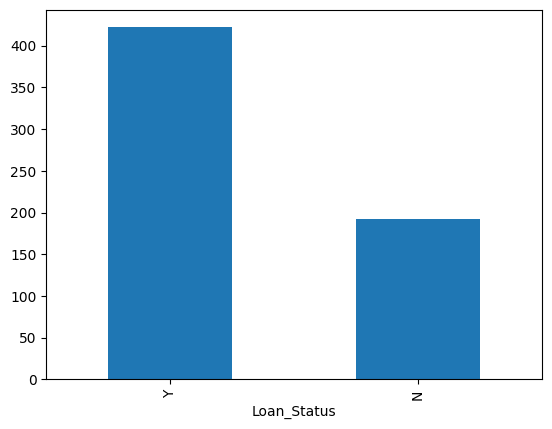

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [12]:
train[train.columns[-1]].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [13]:
values_count = pd.DataFrame(columns=train.columns,data=train.value_counts())
values_count

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


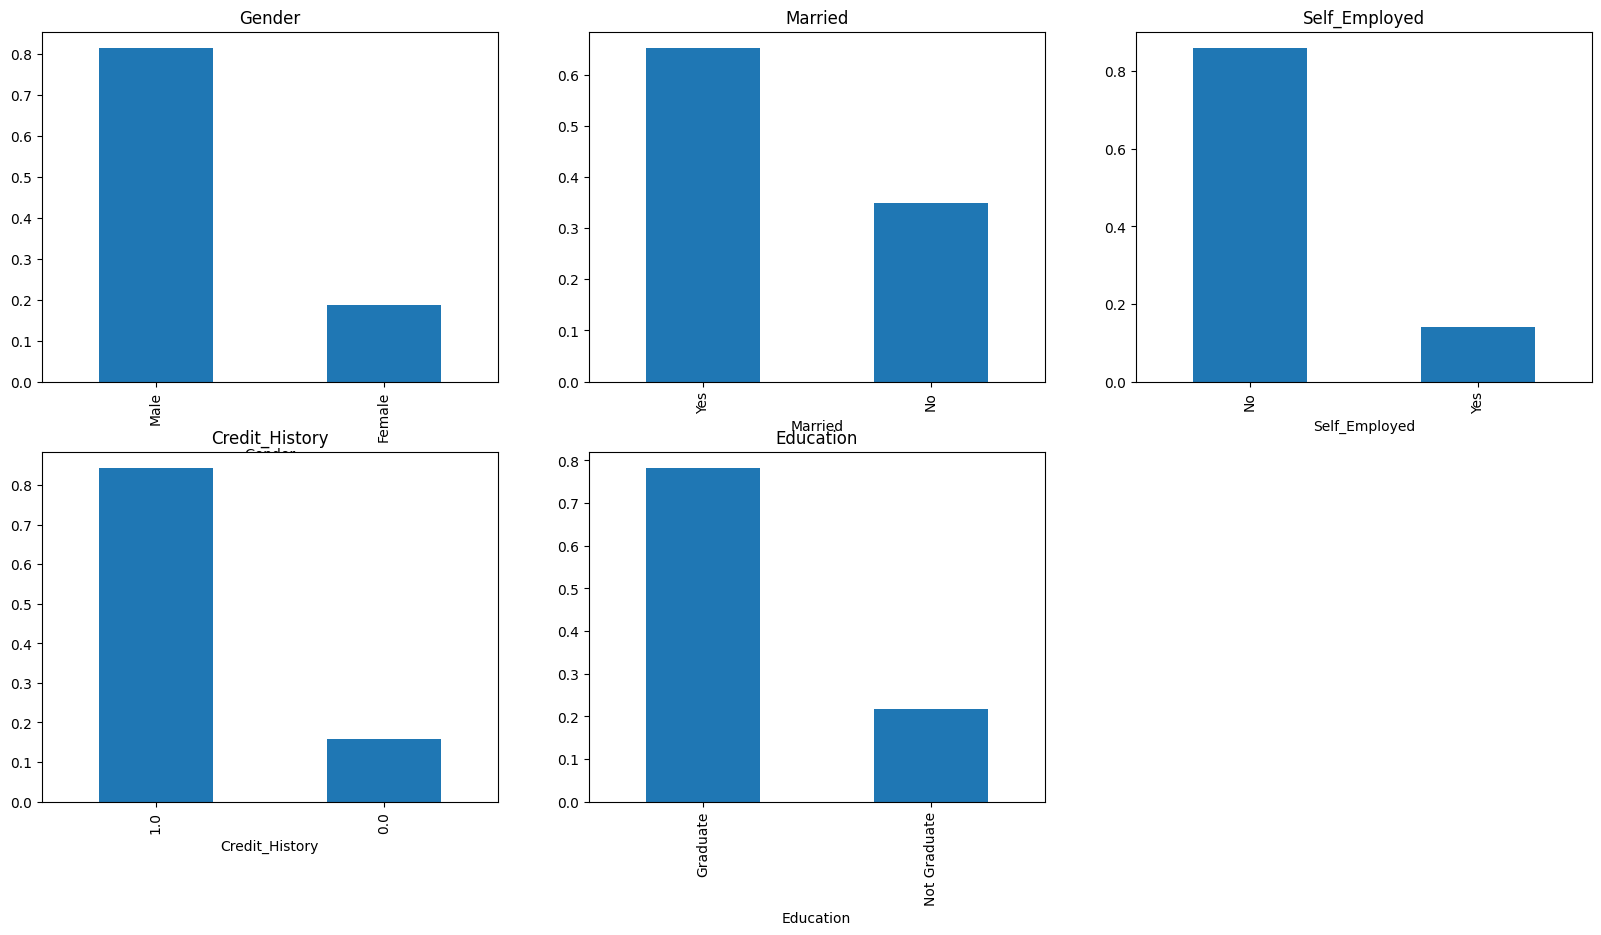

In [14]:
# Independent Variable (Categorical)
"""There are 5 features that are categorical or binary 
(Gender, Married, Self_Employed, Credit_History, Education)"""
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Gender")
plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Married")
plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Self_Employed")
plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Credit_History")
plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Education")

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have credit history (repaid their debts).
Around 80% of the applicants are Graduate.

# Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

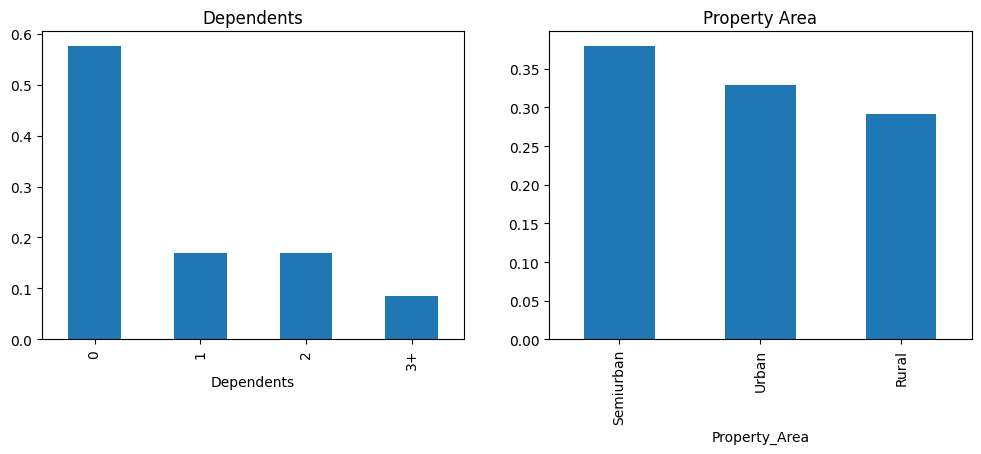

In [15]:
#visualizing Remaining Categorical Variable
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4),title="Dependents")

plt.subplot(122)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,4), title = "Property Area")
plt.show()

In [16]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

# Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

<Axes: >

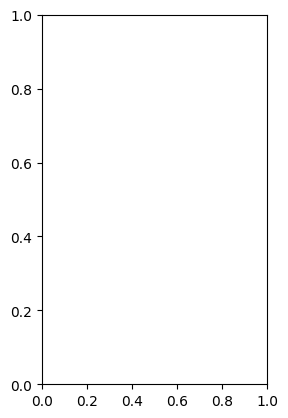

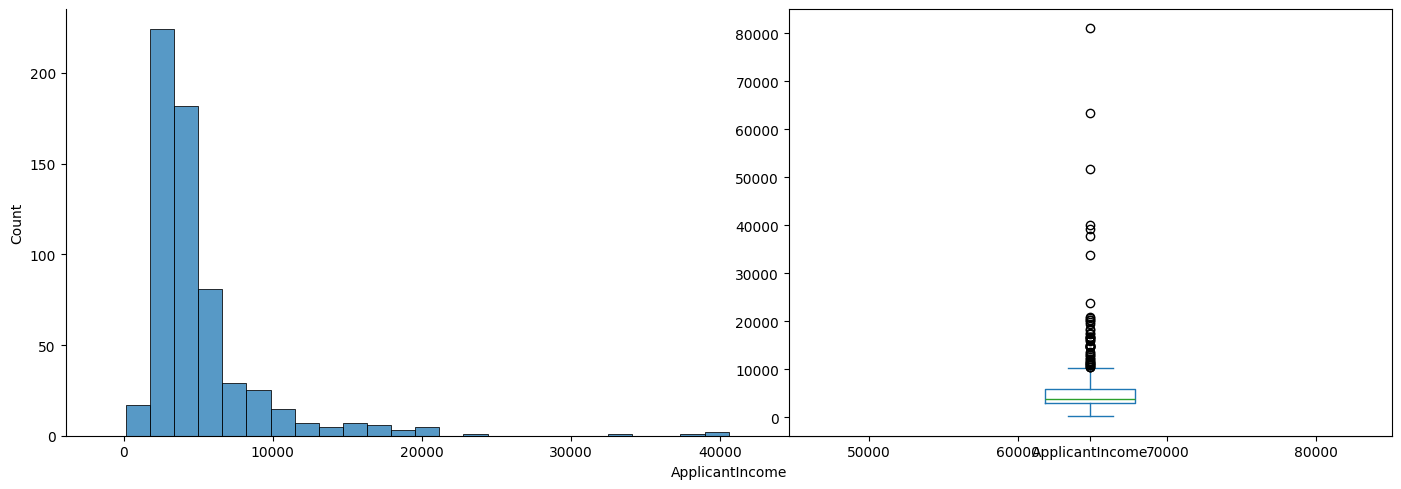

In [17]:
# Visualizing ApplicantIncome
plt.subplot(121)
sns.displot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

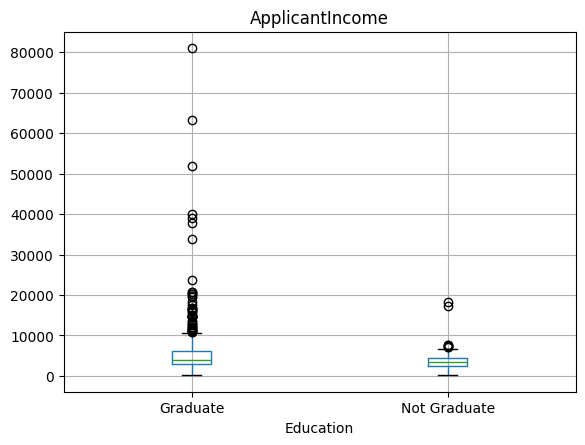

In [18]:
train.boxplot(column="ApplicantIncome", by ='Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, *which are appearing to be the outliers*.

Secondly, Let’s look at the Coapplicant income distribution.

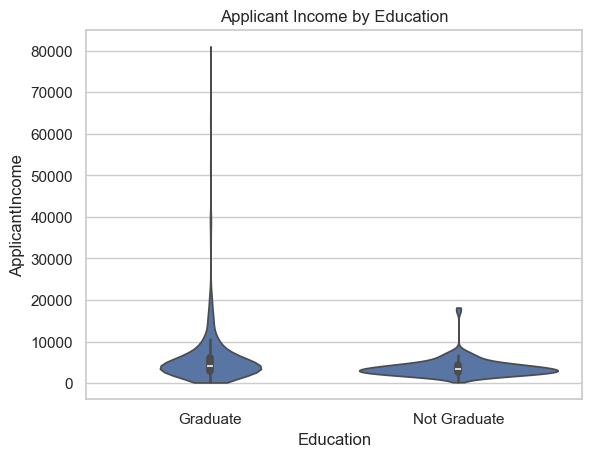

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner="box",
    cut=0
)

plt.title("Applicant Income by Education")
plt.show()

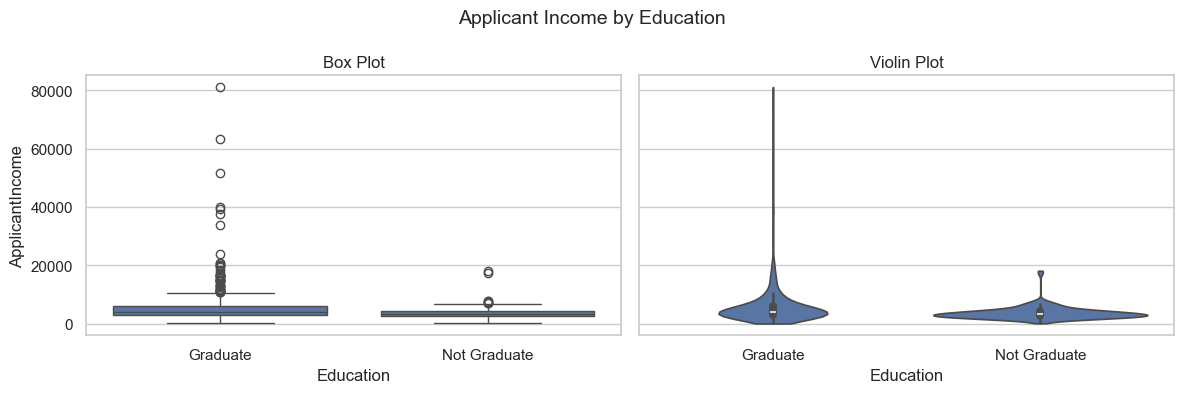

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Box plot
sns.boxplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    ax=axes[0]
)
axes[0].set_title("Box Plot")

# Violin plot
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner="box",
    cut=0,
    ax=axes[1]
)
axes[1].set_title("Violin Plot")

plt.suptitle("Applicant Income by Education", fontsize=14)
plt.tight_layout()
plt.show()


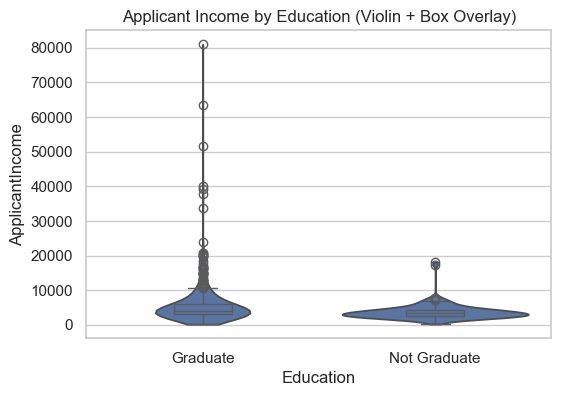

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Violin (background)
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner=None,   # remove internal markings
    cut=0
)

# Box plot (overlay)
sns.boxplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    width=0.25,   # thinner box so violin is visible
    showcaps=True,
    boxprops={"facecolor": "none"},  # transparent box
    showfliers=True
)

plt.title("Applicant Income by Education (Violin + Box Overlay)")
plt.show()


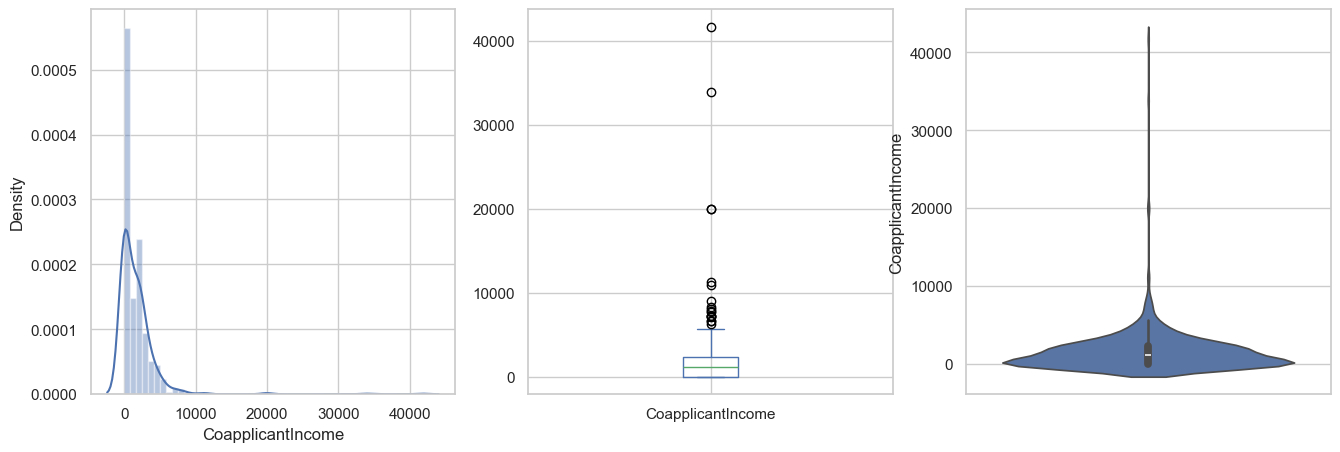

In [22]:
# plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.subplot(133)
sns.violinplot(y=train['CoapplicantIncome'])


plt.show()

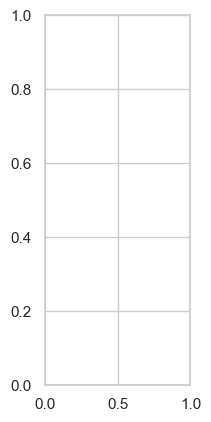

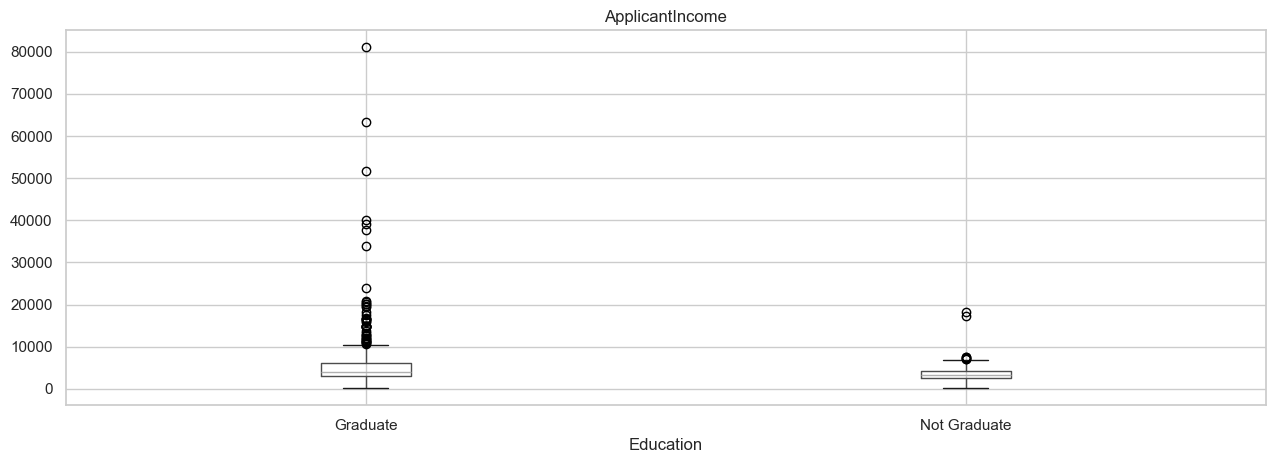

In [23]:
plt.subplot(131)
train.boxplot(column="ApplicantIncome", by = "Education", figsize=(15,5))
plt.suptitle("")
plt.show()

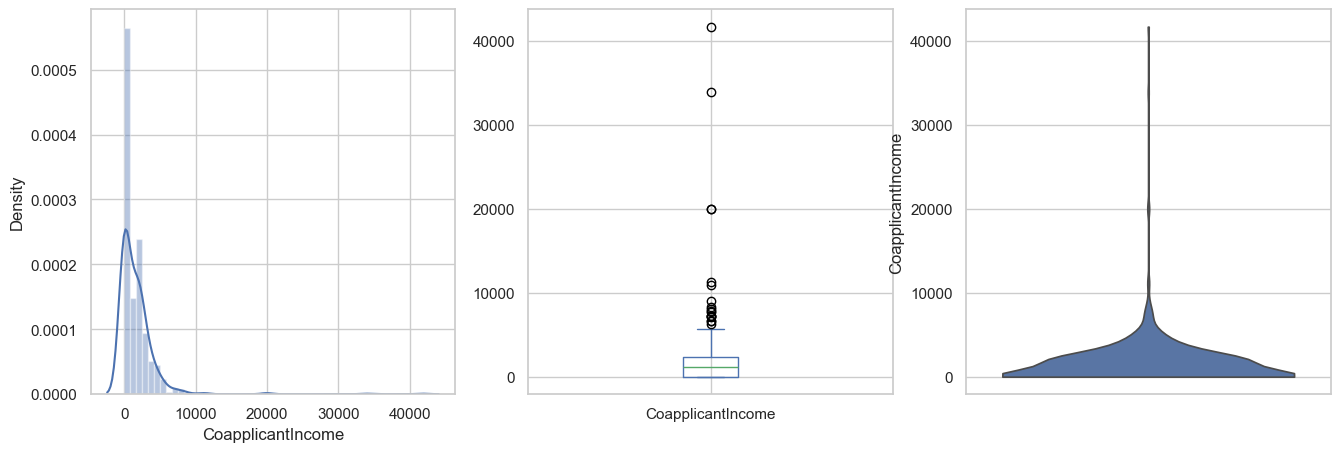

In [26]:
# plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(133)

sns.violinplot(y = train['CoapplicantIncome'], inner=None,cut=0)

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

In [28]:
train['LoanAmount'].isnull().sum()

np.int64(22)

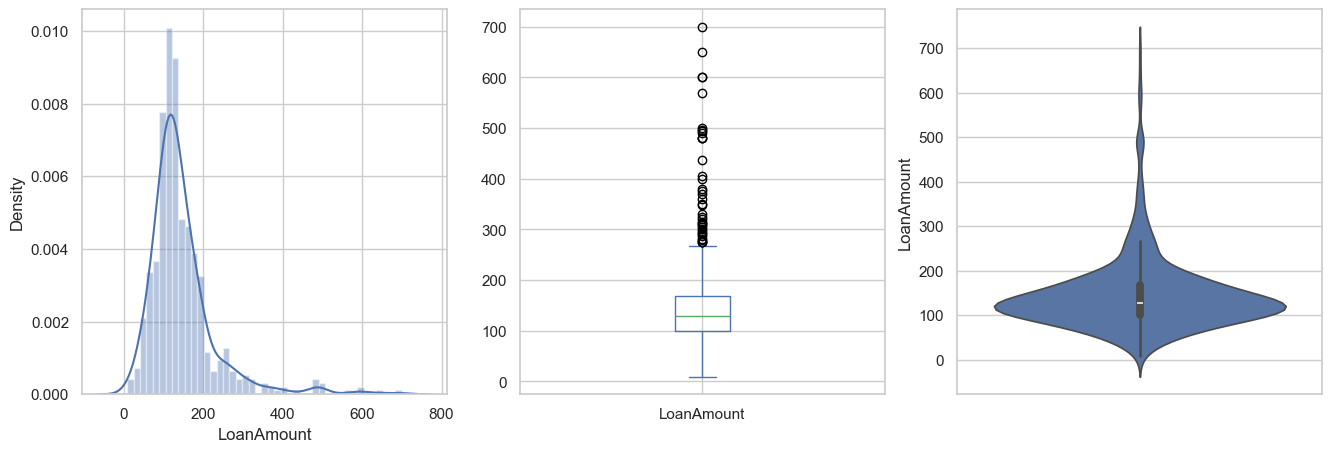

In [33]:
plt.subplot(131)
sns.distplot(train['LoanAmount'])
plt.subplot(132)
train['LoanAmount'].plot.box(figsize  = (16,5))
plt.subplot(133)
sns.violinplot(y=train['LoanAmount'])
plt.show()

In [38]:
df = train.dropna()

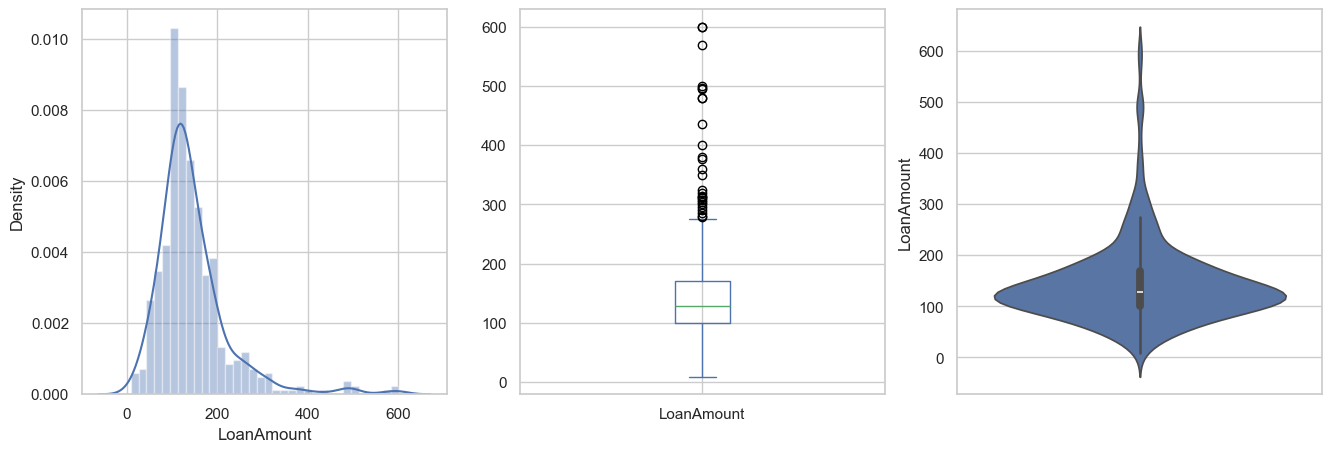

In [43]:
plt.subplot(131)
sns.distplot(df['LoanAmount'])
plt.subplot(132)
df['LoanAmount'].plot.box(figsize  = (16,5))
plt.subplot(133)
sns.violinplot(y=df['LoanAmount'])
plt.show()

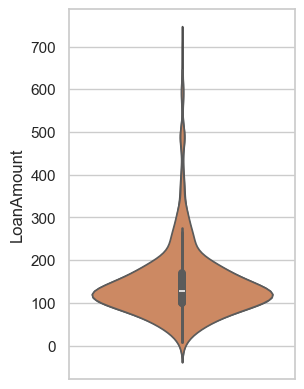

In [45]:
plt.subplot(121)
sns.violinplot(y =train['LoanAmount'])
plt.subplot(121)
sns.violinplot(y = df['LoanAmount'])
plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [46]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [51]:
import matplotlib.pyplot as plt

print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

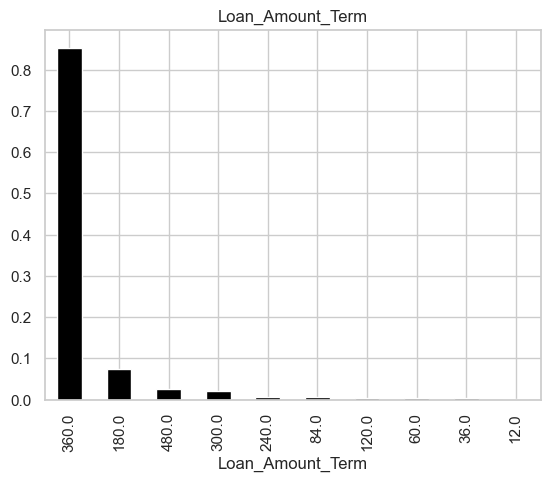

In [57]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term',colormap= 'nipy_spectral')
plt.show()

It can be inferred from the above bar plot that:

Around 85% of the loans are 360 months term or 30 years period
Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

You have ONE Series

Pandas treats it as one data series

Colormaps apply across multiple series, not across individual bars of a single Series

So Pandas does this internally:

“One series → one color”

# Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.